Dataset shape: (10127, 23)

First 5 rows:
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0        

C:\Users\18259\AppData\Local\Temp\ipykernel_22736\3132335188.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^A-Za-z0-9]+', '_')


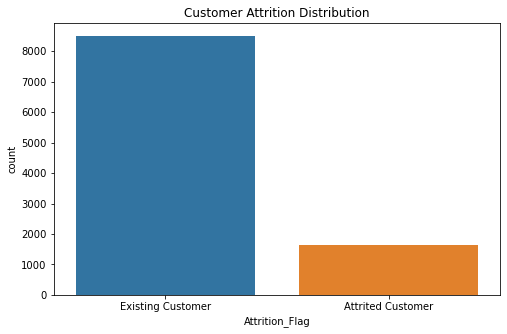

<Figure size 864x576 with 0 Axes>

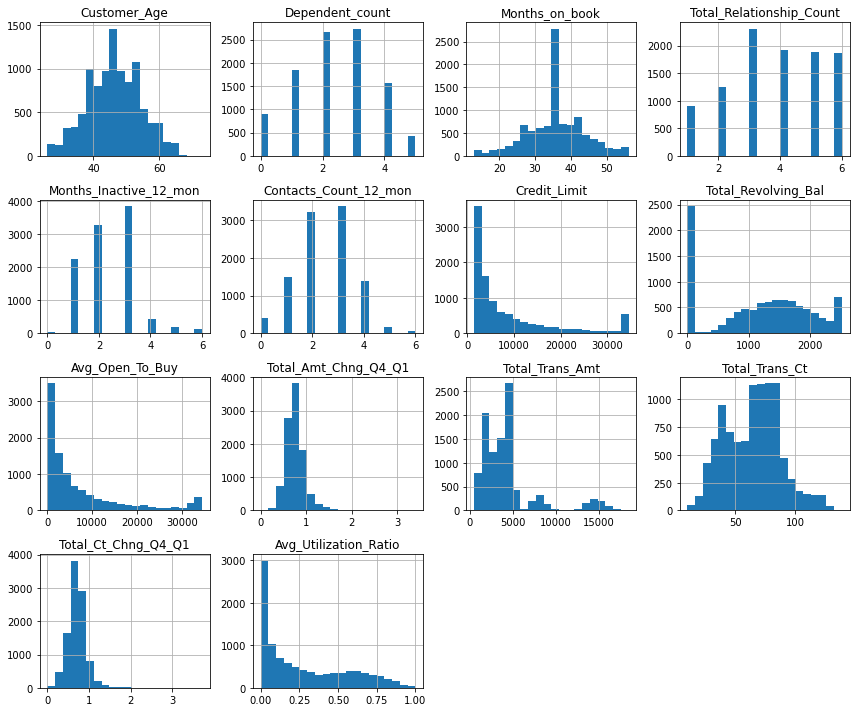

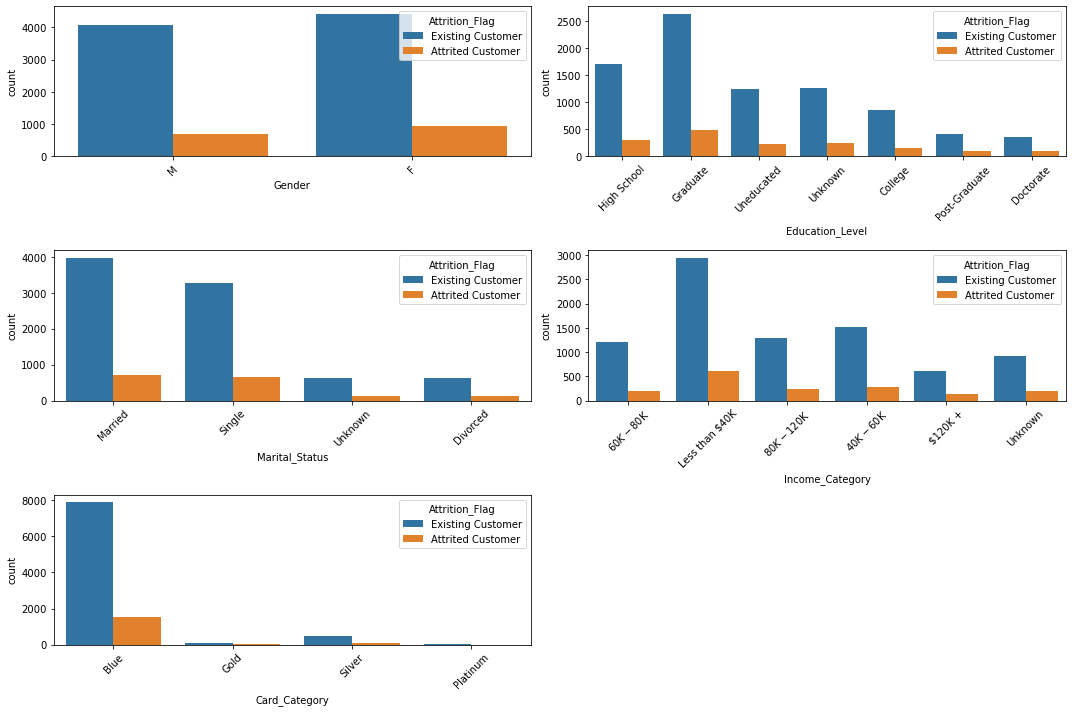

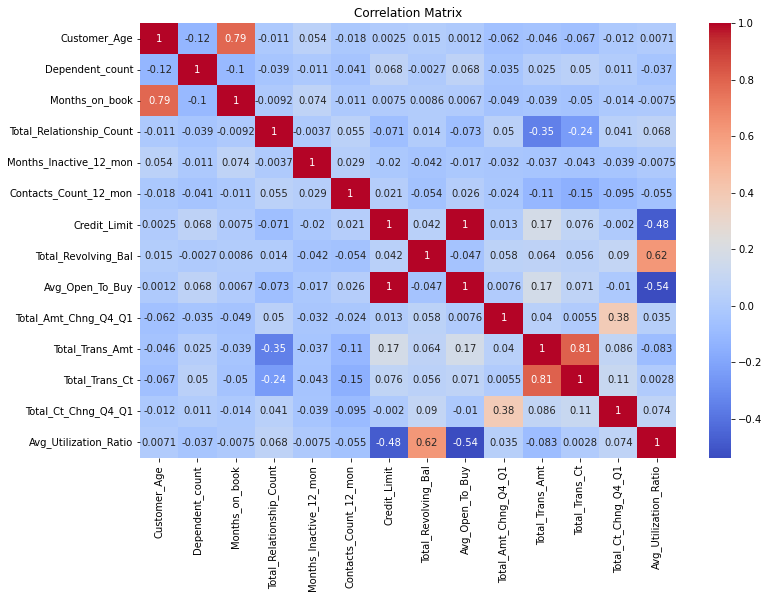

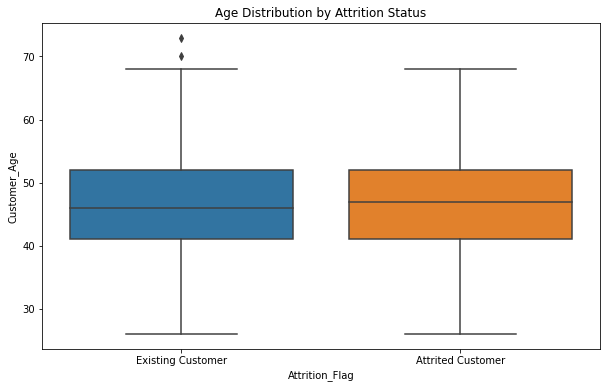

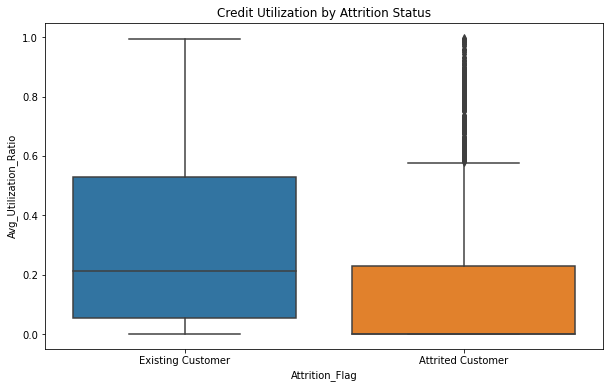

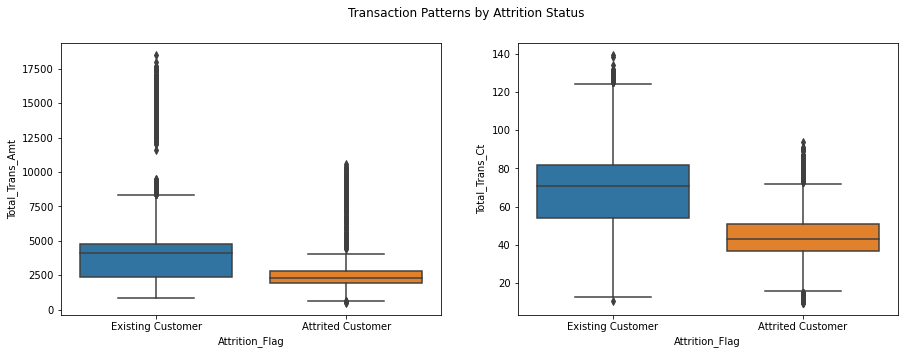

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('BankChurners.csv')

# Initial data exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

# Clean column names (remove special characters)
df.columns = df.columns.str.replace('[^A-Za-z0-9]+', '_')

# Drop the Naive Bayes columns as they seem to be model outputs
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                     'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

# Attrition analysis
plt.figure(figsize=(8,5))
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Customer Attrition Distribution')
plt.show()

# Numerical features analysis
numerical_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 
                 'Total_Relationship_Count', 'Months_Inactive_12_mon', 
                 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

plt.figure(figsize=(12,8))
df[numerical_cols].hist(bins=20, figsize=(12,10))
plt.tight_layout()
plt.show()

# Categorical features analysis
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3,2,i)
    sns.countplot(x=col, hue='Attrition_Flag', data=df)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation analysis
plt.figure(figsize=(12,8))
corr_matrix = df[numerical_cols + ['Attrition_Flag']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Age vs Attrition
plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df)
plt.title('Age Distribution by Attrition Status')
plt.show()

# Credit utilization analysis
plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=df)
plt.title('Credit Utilization by Attrition Status')
plt.show()

# Transaction patterns
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df, ax=ax[0])
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df, ax=ax[1])
plt.suptitle('Transaction Patterns by Attrition Status')
plt.show()